# Sample Notebook for Picasso
This notebook shows some basic interaction with the .hdf5 files using the pandas library.
The sample data was created using Picasso:Simulate. You can download the files here: http://picasso.jungmannlab.org/testdata.zip

## Localizations

In [1]:
# Import pandas and load localizations
import pandas as pd
locs = pd.read_hdf('testdata_locs.hdf5')
locs.head(5)

,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient
0,1,8.655162,15.751859,22524.126953,0.831042,0.815443,245.778885,0.006942,0.007066,0.018770,51570.476562
1,2,8.648773,15.773795,8371.776367,0.812459,0.817693,254.673584,0.013226,0.013162,0.006400,19502.464844
2,3,8.652225,15.759270,22057.003906,0.820107,0.820890,247.785538,0.007076,0.007076,0.000955,50795.972656
3,4,12.119021,9.140491,12995.556641,0.822644,0.815121,251.761398,0.009853,0.009931,0.009145,30979.835938
4,5,12.107412,9.132525,12963.756836,0.822290,0.812809,251.836090,0.009841,0.009940,0.011530,30889.421875


In [2]:
# Summary statistics
locs.describe()

,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient
count,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000,11975.000000
mean,3722.158914,15.707359,15.195064,15762.903320,0.882754,0.881923,254.407959,7.851098,0.013463,0.038097,33154.003906
std,2166.421221,6.673537,6.798321,11557.393555,0.381869,0.350621,52.043056,857.708679,0.067015,0.102378,18707.205078
min,1.000000,4.686683,3.652770,1995.303223,0.574352,0.010394,0.010000,0.004063,0.004038,0.000005,5005.422852
25%,1864.000000,9.101562,8.921840,7914.393799,0.814429,0.814602,248.613914,0.007682,0.007672,0.005444,17803.784180
50%,3641.000000,15.519595,15.397079,13785.222656,0.823050,0.823292,251.096085,0.009931,0.009915,0.011980,30959.279297
75%,5600.000000,21.977646,21.919250,20501.622070,0.831703,0.831800,253.810555,0.014712,0.014678,0.024029,45398.443359
max,7498.000000,27.528376,25.868370,132757.953125,15.199163,4.787292,747.733948,93859.367188,7.044014,0.998207,135029.250000


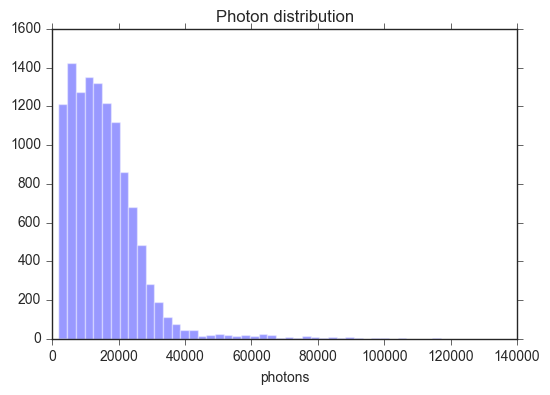

In [3]:
# Plot some basic statistics using seaborn, i.e. photon distribution   
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt

sns.distplot(locs.photons.dropna(), kde=False)
plt.title('Photon distribution')
plt.show()

## Picked localizations

In [4]:
# load picked loaclizations 
picked = pd.read_hdf('testdata_locs_picked.hdf5')
# Calculate mean of each column per group:
picked.groupby('group').mean().head(5)

,frame,x,y,photons,sx,sy,bg,lpx,lpy,ellipticity,net_gradient
group,,,,,,,,,,,
0,4167.515625,5.414716,5.530522,15084.879883,0.825377,0.873640,255.626190,0.013813,0.011832,0.028520,33840.328125
1,4072.211538,18.788691,5.512330,14618.959961,0.830022,0.845893,254.971436,0.011836,0.011638,0.025027,32301.683594
2,3261.839041,15.458117,5.510264,13992.783203,0.830638,0.841661,255.024200,0.013703,0.012202,0.026371,31473.730469
3,3880.231023,5.492543,8.833045,15567.796875,0.840453,0.830090,256.448090,0.011187,0.011317,0.026439,34638.371094
4,3748.107807,5.550508,22.123514,15610.172852,0.845104,0.852527,256.128906,0.012486,0.012017,0.024607,34709.191406


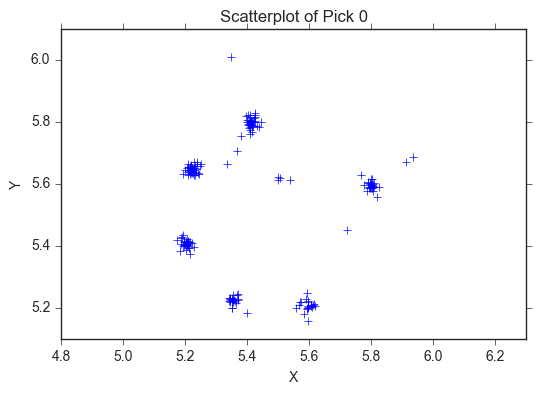

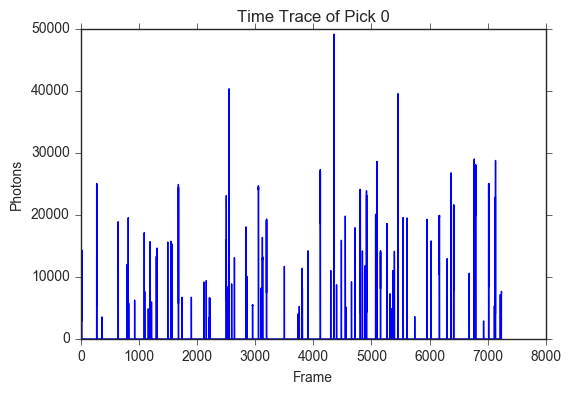

In [5]:
# Display a scatterplot of localizations of group 0
import numpy as np

# Select pick 0
pick_one = picked[picked.group==0]

# Scatterplot
plt.plot(pick_one['x'], pick_one['y'],'+')
plt.axis('equal')
plt.title('Scatterplot of Pick 0')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Time trace with photon values
xvec = np.arange(max(pick_one["frame"]) + 1)
yvec = xvec[:] * 0
yvec[pick_one["frame"]] = pick_one['photons']

plt.plot(xvec, yvec)
plt.title('Time Trace of Pick 0')
plt.xlabel('Frame')
plt.ylabel('Photons')
plt.show()
